In [1]:
from openff.toolkit.topology import Molecule
from rdkit.Chem import AllChem as Chem

from fragmenter import CyclodextrinFragmenter

LICENSE: Could not open license file "oe_license.txt" in local directory
LICENSE: N.B. OE_LICENSE environment variable is not set
LICENSE: N.B. OE_DIR environment variable is not set
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!


## Cyclodextrin molecule
If you don't have OpenEye-Toolkit you won't be able to load a MOL2 file directly using the OpenFF-Toolkit.

Uncomment the second line for loading from a MOL2 file .

In [8]:
folder = "derivative"

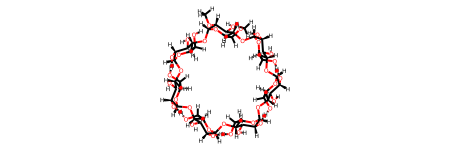

In [2]:
input_mol = mol = Molecule.from_file(f"{folder}/bcd-methyl.sdf").to_rdkit()
# input_mol = Chem.MolFromMol2File("bcd-methyl.mol2", removeHs=False)

input_mol

## Glucose Monomer
**Note:** I labelled the O1 and C4 atoms with '1' and '4' dummy atoms. This necessary to but the bonds in the fragmenter

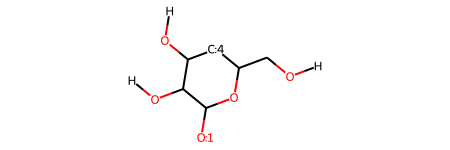

In [3]:
fragment_pure = "[#6]1(-[#8:1])-[#6](-[#8]-[#1])-[#6](-[#8]-[#1])-[#6$([#6]-[#8]):4]-[#6](-[#6]-[#8]-[#1])-[#8]-1"

monomer_pure = Chem.MolFromSmarts(fragment_pure)
monomer_pure

## 2,6-di-O-methyl monomer
**Note:** I labelled the O1 and C4 atoms with '1' and '4' dummy atoms. This necessary to but the bonds in the fragmenter

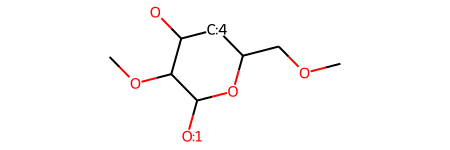

In [4]:
fragment_methyl = "[#6]1(-[#8:1])-[#6](-[#8]-[#6])-[#6](-[#8])-[#6$([#6]):4]-[#6](-[#6]-[#8]-[#6])-[#8]-1"

monomer_methyl = Chem.MolFromSmarts(fragment_methyl)
monomer_methyl

## Assign partial charges to Cyclodextrin molecule

In [5]:
# Create an instance of the fragmenter
cyclodextrin = CyclodextrinFragmenter(input_mol)
cyclodextrin.add_monomer(monomer_pure)
cyclodextrin.add_monomer(monomer_methyl)

In [6]:
# Assign AM1-BCC partial charges
cyclodextrin.assign_partial_charges(partial_charge_method="am1bcc")

In [7]:
# Save molecule with partial charges to file
cyclodextrin.to_file(f"{folder}/bcd-methyl.am1bcc.sdf", file_format="SDF")
cyclodextrin.to_file(f"{folder}/bcd-methyl.am1bcc.mol2", file_format="MOL2")
cyclodextrin.to_file(f"{folder}/bcd-methyl.am1bcc.pdb", file_format="PDB")